### Deliverable 1: Preprocessing the Data for a Neural Network

In [3]:

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = "EIN")
application_df = application_df.drop(columns = "NAME")
application_df.head()

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  \
0   Association       1              0                      N     5000   
1  Co-operative       1         1-9999                      N   108590   
2   Association       1              0                      N     5000   
3         Trust       1    10000-24999                      N     6692   
4         Trust       1  100000-499999                      N   142590   

   IS_SUCCESSFUL  
0              1  
1              1  
2              0  
3              1  
4              1

In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

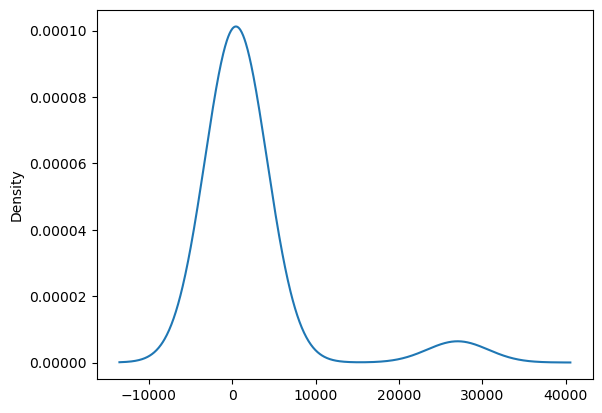

In [7]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [8]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 300].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df["CLASSIFICATION"].value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

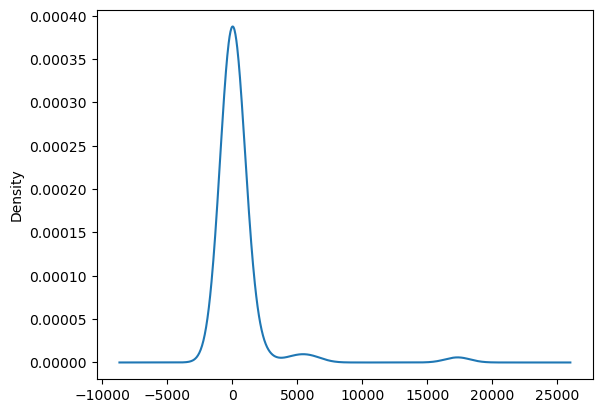

In [10]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [11]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts <1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# Generate our categorical variable lists
application_df.dtypes
application_cat= ['APPLICATION_TYPE','AFFILIATION','CLASSIFICATION','USE_CASE','ORGANIZATION','INCOME_AMT','SPECIAL_CONSIDERATIONS']
application_cat


['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\david\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  \
0                     0.0                   1.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   

   APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  APPLICATION_TYPE_T8  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  ...  INCOME_AMT_1-9999  \
0                           0.0  ...                0.0   
1                           0.0  ...                1.0   
2                           1.0  ...                0.0   
3                           1.0  ...                0.0   
4                           0.0  ...                0.0   

   INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  INCOME_AMT_10M-50M  \
0                     0.0                       0.0                 0.0   
1                     0.0                       0.0                 0.0   
2                     0.0                       0.0                 0.0   
3                     1.0                       0.0                 0.0   
4                     0.0                       1.0                 0.0   

   INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0               0.0                     0.0              0.0   
1               0.0                     0.0              0.0   
2               0.0                     0.0              0.0   
3               0.0                     0.0              0.0   
4               0.0                     0.0              0.0   

   INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  
0                0.0                       1.0                       0.0  
1                0.0                       1.0                       0.0  
2                0.0                       1.0                       0.0  
3                0.0                       1.0                       0.0  
4                0.0                       1.0                       0.0  

[5 rows x 41 columns]

In [14]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True).drop(application_cat,1)
application_df.head()

C:\Users\david\AppData\Local\Temp\ipykernel_28716\2634593634.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df = application_df.merge(encode_df,left_index=True, right_index=True).drop(application_cat,1)


STATUS  ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
0       1     5000              1                     0.0   
1       1   108590              1                     0.0   
2       1     5000              0                     0.0   
3       1     6692              1                     0.0   
4       1   142590              1                     0.0   

   APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                   1.0                   0.0                  0.0   
1                   0.0                   0.0                  1.0   
2                   0.0                   0.0                  0.0   
3                   0.0                   0.0                  1.0   
4                   0.0                   0.0                  1.0   

   APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  ...  \
0                  0.0                  0.0                  0.0  ...   
1                  0.0                  0.0                  0.0  ...   
2                  0.0                  1.0                  0.0  ...   
3                  0.0                  0.0                  0.0  ...   
4                  0.0                  0.0                  0.0  ...   

   INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                0.0                     0.0                       0.0   
1                1.0                     0.0                       0.0   
2                0.0                     0.0                       0.0   
3                0.0                     1.0                       0.0   
4                0.0                     0.0                       1.0   

   INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                 0.0               0.0                     0.0   
1                 0.0               0.0                     0.0   
2                 0.0               0.0                     0.0   
3                 0.0               0.0                     0.0   
4                 0.0               0.0                     0.0   

   INCOME_AMT_50M+  INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  \
0              0.0                0.0                       1.0   
1              0.0                0.0                       1.0   
2              0.0                0.0                       1.0   
3              0.0                0.0                       1.0   
4              0.0                0.0                       1.0   

   SPECIAL_CONSIDERATIONS_Y  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 44 columns]

In [15]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=78)

C:\Users\david\AppData\Local\Temp\ipykernel_28716\335293292.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = application_df.drop(['IS_SUCCESSFUL'],1).values


In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [71]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 7

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = number_input_features, activation = 'relu')
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

#Third HL
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3,activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 10)                440       
                                                                 
 dense_47 (Dense)            (None, 7)                 77        
                                                                 
 dense_48 (Dense)            (None, 5)                 40        
                                                                 
 dense_49 (Dense)            (None, 1)                 6         
                                                                 
Total params: 563
Trainable params: 563
Non-trainable params: 0
_________________________________________________________________


In [72]:
# Compile the model
nn.compile(loss='binary_crossentropy',optimizer='adam', metrics =["accuracy"])

In [73]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 11655.0723 - accuracy: 0.5190
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 1283.7882 - accuracy: 0.4960
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 2637.1914 - accuracy: 0.4987
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 1000.4528 - accuracy: 0.4901
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 350.3284 - accuracy: 0.5155
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 72.0304 - accuracy: 0.5190
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6915 - accuracy: 0.5321
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss:

804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 90/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 

In [74]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7118 - accuracy: 0.4894 - 388ms/epoch - 1ms/step
Loss: 0.7118464708328247, Accuracy: 0.48944607377052307


In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 7
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = number_input_features, activation = 'relu')
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

#Third HL
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3,activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Check the structure of the model
nn.summary()

In [ ]:
# Compile the model
nn.compile(loss='binary_crossentropy',optimizer='adam', metrics =["accuracy"])

In [70]:
# Train the model
fit_model2 = nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 90/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 

In [75]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7118 - accuracy: 0.4894 - 301ms/epoch - 1ms/step
Loss: 0.7118464708328247, Accuracy: 0.48944607377052307


In [76]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 7

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = number_input_features, activation = 'tanh')
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='tanh'))

#Third HL
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3,activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1,activation='tanh'))

# Check the structure of the model
nn.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 10)                440       
                                                                 
 dense_51 (Dense)            (None, 7)                 77        
                                                                 
 dense_52 (Dense)            (None, 5)                 40        
                                                                 
 dense_53 (Dense)            (None, 1)                 6         
                                                                 
Total params: 563
Trainable params: 563
Non-trainable params: 0
_________________________________________________________________


In [77]:
# Compile the model
nn.compile(loss='binary_crossentropy',optimizer='adam', metrics =["accuracy"])

In [78]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 8.2084 - accuracy: 0.4679
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 8.2084 - accuracy: 0.4679
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 8.2084 - accuracy: 0.4679
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 8.2084 - accuracy: 0.4679
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 8.2084 - accuracy: 0.4679
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 8.2084 - accuracy: 0.4679
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 8.2084 - accuracy: 0.4679
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 8.2084 - accuracy: 0.4679
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 8.2084 - accuracy: 0.4679
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 8.2084 - accura

804/804 [==============================] - 1s 1ms/step - loss: 8.2084 - accuracy: 0.4679
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 8.2084 - accuracy: 0.4679
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 8.2084 - accuracy: 0.4679
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 8.2084 - accuracy: 0.4679
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 8.2084 - accuracy: 0.4679
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 8.2084 - accuracy: 0.4679
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 8.2084 - accuracy: 0.4679
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 8.2084 - accuracy: 0.4679
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 8.2084 - accuracy: 0.4679
Epoch 90/100
804/804 [==============================] - 1s 1ms/step - loss: 8.2084 - accuracy: 

In [79]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 3.5151 - accuracy: 0.4819 - 402ms/epoch - 1ms/step
Loss: 3.5151383876800537, Accuracy: 0.48186588287353516


In [85]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 7

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim = number_input_features, activation = 'leaky_relu')
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

#Third HL
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3,activation="sigmoid"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 10)                440       
                                                                 
 dense_59 (Dense)            (None, 7)                 77        
                                                                 
 dense_60 (Dense)            (None, 5)                 40        
                                                                 
 dense_61 (Dense)            (None, 1)                 6         
                                                                 
Total params: 563
Trainable params: 563
Non-trainable params: 0
_________________________________________________________________


In [86]:
# Compile the model
nn.compile(loss='binary_crossentropy',optimizer='adam', metrics =["accuracy"])

In [87]:
# Train the model
fit_model = nn.fit(X_train, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.7062 - accuracy: 0.5321
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6913 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 90/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6912 - accuracy: 

In [84]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7333 - accuracy: 0.5331 - 421ms/epoch - 2ms/step
Loss: 0.7333089113235474, Accuracy: 0.5330612063407898
